<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [8]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [9]:


START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [10]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2020-01-01,1970.776855,1985.596599,1958.411679,1971.140446,1354908
1,2020-01-02,1961.730347,1982.005500,1954.047670,1982.005500,2380752
2,2020-01-03,2000.825806,2021.146463,1967.503799,1967.503799,4655761
3,2020-01-06,2000.644165,2023.828708,1989.233689,2004.781059,3023209
4,2020-01-07,2005.554199,2013.554963,1985.506342,2000.689902,2429317


In [11]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-11-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,1970.776855,1985.596599,1958.411679,1971.140446,1354908
1,1961.730347,1982.005500,1954.047670,1982.005500,2380752
2,2000.825806,2021.146463,1967.503799,1967.503799,4655761
3,2000.644165,2023.828708,1989.233689,2004.781059,3023209
4,2005.554199,2013.554963,1985.506342,2000.689902,2429317


Visualizing Closing Price

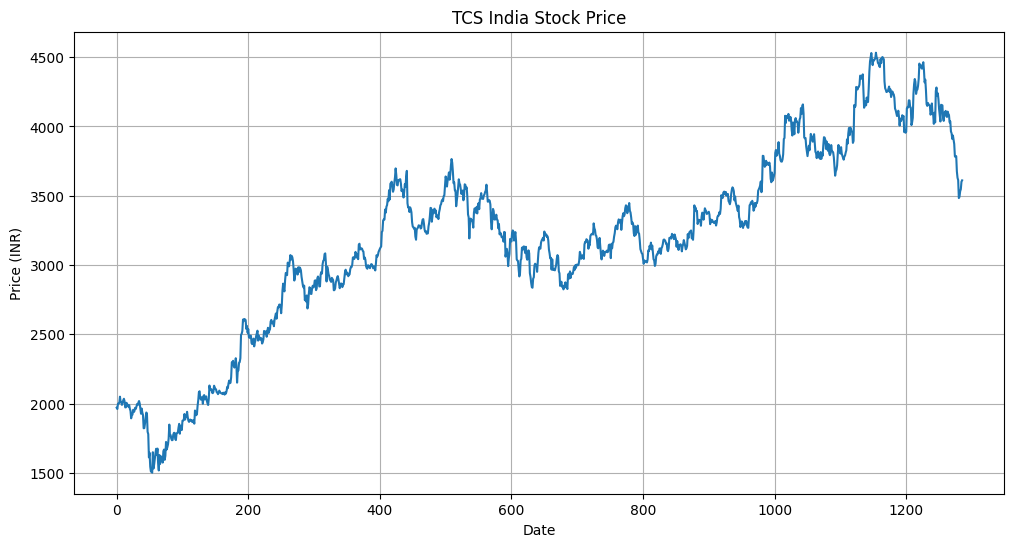

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [13]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,1970.776855,1985.596599,1958.411679,1971.140446,1354908
1,1961.730347,1982.005500,1954.047670,1982.005500,2380752
2,2000.825806,2021.146463,1967.503799,1967.503799,4655761
3,2000.644165,2023.828708,1989.233689,2004.781059,3023209
4,2005.554199,2013.554963,1985.506342,2000.689902,2429317
...,...,...,...,...,...
1281,3493.050049,3523.250000,3476.149902,3485.000000,4990439
1282,3532.050049,3551.000000,3464.300049,3474.000000,2797737
1283,3547.050049,3600.350098,3520.850098,3520.850098,2501894


# Plotting moving averages of 100 day

---



In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1281,4104.748438
1282,4097.998079
1283,4092.175957
1284,4087.024238


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

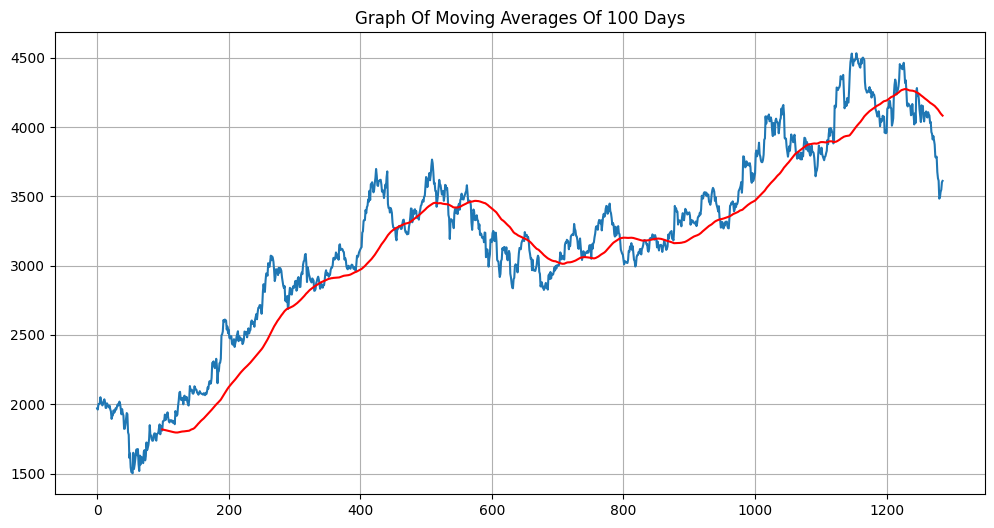

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1281,4122.164987
1282,4120.459192
1283,4119.160269
1284,4118.203102


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

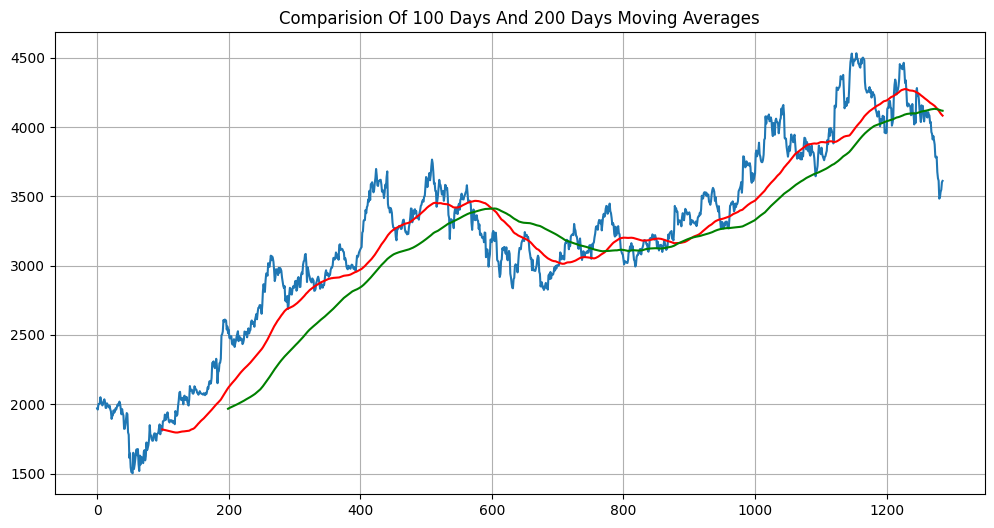

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [18]:
df.shape

(1286, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [19]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(900, 6)
(386, 6)


In [20]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2020-01-01,1970.776855,1985.596599,1958.411679,1971.140446,1354908
1,2020-01-02,1961.730347,1982.005500,1954.047670,1982.005500,2380752
2,2020-01-03,2000.825806,2021.146463,1967.503799,1967.503799,4655761
3,2020-01-06,2000.644165,2023.828708,1989.233689,2004.781059,3023209
4,2020-01-07,2005.554199,2013.554963,1985.506342,2000.689902,2429317


In [21]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
900,2023-08-16,3384.547852,3391.985654,3361.843321,3376.327324,1328445
901,2023-08-17,3362.381348,3386.896466,3340.312843,3381.220274,1843241
902,2023-08-18,3295.197266,3337.181061,3284.823528,3337.181061,2526749
903,2023-08-21,3329.009521,3336.936646,3299.992777,3302.928713,1375579
904,2023-08-22,3309.926025,3338.160046,3293.191329,3327.394944,1222012


# Using MinMax scaler for normalization of the dataset

---



In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [24]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.22983813],
       [0.23446721],
       [0.22828873],
       [0.24417079],
       [0.24242774],
       [0.2441709 ],
       [0.26111791],
       [0.25308059],
       [0.24914854],
       [0.24029697],
       [0.2472696 ],
       [0.25267328],
       [0.25801885],
       [0.24025821],
       [0.23059365],
       [0.23487385],
       [0.24797383],
       [0.24065529],
       [0.24016998],
       [0.23407458],
       [0.23834537],
       [0.22863933],
       [0.22064123],
       [0.2255333 ],
       [0.21660368],
       [0.21116826],
       [0.22281561],
       [0.22048618],
       [0.22122366],
       [0.22980406],
       [0.2251839 ],
       [0.23366705],
       [0.23951018],
       [0.24298491],
       [0.24414953],
       [0.250284  ],
       [0.24591622],
       [0.22708635],
       [0.21136246],
       [0.22630987],
       [0.21308996],
       [0.19292058],
       [0.18010849],
       [0.17428503],
       [0.18826176],
       [0.1997926 ],
       [0.20456799],
       [0.195

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(800, 100, 1)

# ML Model (LSTM)

---



In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [31]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)
# use 100 if needed

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.2597 - mean_absolute_error: 0.4442
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0726 - mean_absolute_error: 0.2249
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0203 - mean_absolute_error: 0.1180
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0174 - mean_absolute_error: 0.1068
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0156 - mean_absolute_error: 0.0968
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0148 - mean_absolute_error: 0.0927
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0126 - mean_absolute_error: 0.0885
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0145 - mean_absolute_error: 0.0943
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0102 - mean_absolute_error: 0.0788
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0137 - mean_absolute_error: 0.0912


In [32]:
model.save('keras_model.h5')

In [33]:
test_close.shape

(386, 1)

In [34]:
past_100_days = pd.DataFrame(train_close[-100:])

In [35]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [37]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [38]:
final_df.head()

,0
0,3071.078754
1,3045.547969
2,3032.709603
3,3018.030994
4,3050.973738


In [39]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04946665],
       [0.03310187],
       [0.0248727 ],
       [0.01546397],
       [0.03657969],
       [0.02794722],
       [0.02297863],
       [0.024221  ],
       [0.06207365],
       [0.08381043],
       [0.0593102 ],
       [0.08384147],
       [0.08073625],
       [0.10806239],
       [0.08567347],
       [0.07452589],
       [0.02738832],
       [0.04033701],
       [0.02530787],
       [0.        ],
       [0.01242092],
       [0.03794607],
       [0.05775745],
       [0.05651557],
       [0.05899957],
       [0.06856382],
       [0.09005171],
       [0.07825218],
       [0.05598738],
       [0.0807362 ],
       [0.0962624 ],
       [0.10098257],
       [0.12420961],
       [0.13600964],
       [0.11747145],
       [0.12048359],
       [0.10321806],
       [0.10306297],
       [0.08443162],
       [0.07452588],
       [0.08694681],
       [0.13414618],
       [0.11551511],
       [0.12669403],
       [0.12638339],
       [0.16818015],
       [0.13973598],
       [0.136

In [40]:
input_data.shape

(486, 1)

# Testing the model

---



In [41]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(386, 100, 1)
(386,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [43]:
# Making predictions

y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


In [44]:
y_pred.shape

(386, 1)

In [45]:
y_test

array([0.24512561, 0.2482619 , 0.22003354, 0.19807839, 0.21376081,
       0.206233  , 0.2187793 , 0.19807824, 0.209997  , 0.20187349,
       0.21250602, 0.21438806, 0.19243279, 0.1999604 , 0.22630647,
       0.23508876, 0.23308135, 0.24841855, 0.25265301, 0.27147199,
       0.32109094, 0.32043205, 0.31905198, 0.32670504, 0.32667369,
       0.33203709, 0.32918303, 0.340788  , 0.31889514, 0.33294662,
       0.33921949, 0.29982555, 0.2979438 , 0.26789636, 0.31036407,
       0.33357402, 0.36747926, 0.36434285, 0.37058442, 0.32353734,
       0.29530914, 0.31789166, 0.29530907, 0.28339049, 0.26298916,
       0.25097662, 0.26519039, 0.21330456, 0.19918554, 0.18783351,
       0.18783348, 0.21865052, 0.19097793, 0.18355675, 0.20795874,
       0.20355628, 0.2054431 , 0.20132378, 0.21305287, 0.18028647,
       0.19160707, 0.20865075, 0.2381783 , 0.28081905, 0.27666816,
       0.29449793, 0.28217109, 0.30103871, 0.27855484, 0.25519062,
       0.27022175, 0.2818254 , 0.2821712 , 0.31025211, 0.30606

In [46]:
y_pred

array([[0.25648642],
       [0.25871643],
       [0.26095912],
       [0.2631878 ],
       [0.2653521 ],
       [0.26740587],
       [0.26930505],
       [0.27102384],
       [0.2725333 ],
       [0.2738195 ],
       [0.27487403],
       [0.2757056 ],
       [0.2763328 ],
       [0.2767646 ],
       [0.27701405],
       [0.2771136 ],
       [0.27710697],
       [0.277038  ],
       [0.27695584],
       [0.2769105 ],
       [0.2769623 ],
       [0.2772149 ],
       [0.27778602],
       [0.27878946],
       [0.28032866],
       [0.28247416],
       [0.28527883],
       [0.28876412],
       [0.29291984],
       [0.2976728 ],
       [0.30293292],
       [0.30860826],
       [0.31455052],
       [0.3205943 ],
       [0.32654124],
       [0.33225587],
       [0.33768046],
       [0.34284815],
       [0.34782782],
       [0.35270476],
       [0.35749203],
       [0.3621176 ],
       [0.366511  ],
       [0.37059152],
       [0.3742724 ],
       [0.37744492],
       [0.38000178],
       [0.381

In [47]:
scaler.scale_

array([0.00064098])

In [48]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

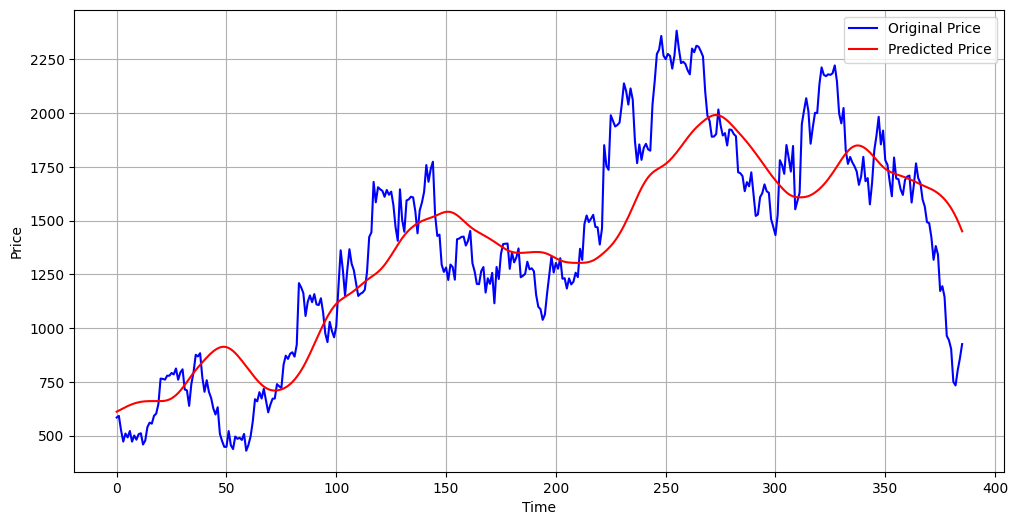

In [49]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 14.42%


Calculation of R2 score

In [51]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.7420705956968425


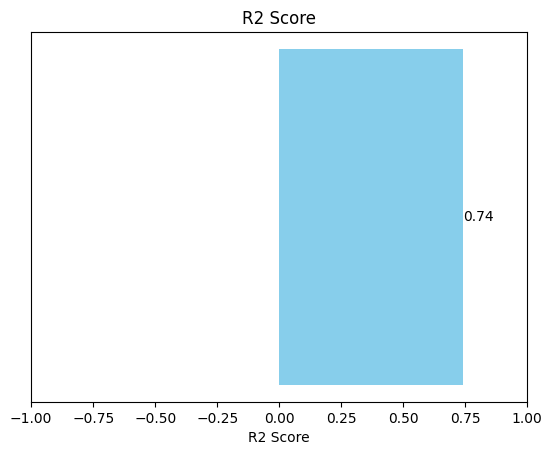

In [52]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

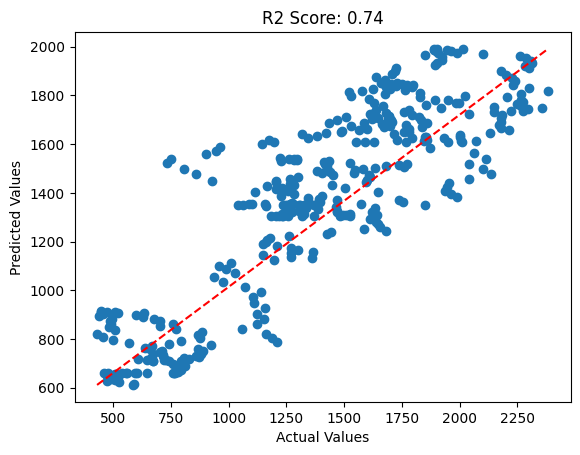

In [53]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()